In [4]:
import pandas as pd

# read data test

In [2]:
date = '0827'

df = pd.read_csv('./data/originalData/08共享单车数据-{}.csv'.format(date))

In [3]:
df.head()

,BIKE_ID,DATA_TIME,LOCK_STATUS,LONGITUDE,LATITUDE
0,713ED790798C3233E0533C0BA8C09291,2018-08-27 0:03:59,1,121.522145,31.322518
1,713ED7A59E403233E0533C0BA8C09291,2018-08-27 0:03:23,1,121.512027,31.219452
2,713ED79569613233E0533C0BA8C09291,2018-08-27 0:04:53,0,121.412892,31.270688
3,713ED7918CB63233E0533C0BA8C09291,2018-08-27 0:03:55,1,121.293465,31.303237
4,713ED7AE329B3233E0533C0BA8C09291,2018-08-27 0:04:12,1,121.589243,31.095330


# 一天数据提取

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4307514 entries, 0 to 4307513
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   BIKE_ID      object 
 1   DATA_TIME    object 
 2   LOCK_STATUS  int64  
 3   LONGITUDE    float64
 4   LATITUDE     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 164.3+ MB


In [5]:
df['DATA_TIME'] = df['DATA_TIME'].astype('datetime64')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4307514 entries, 0 to 4307513
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   BIKE_ID      object        
 1   DATA_TIME    datetime64[ns]
 2   LOCK_STATUS  int64         
 3   LONGITUDE    float64       
 4   LATITUDE     float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 164.3+ MB


In [7]:
df.head()

,BIKE_ID,DATA_TIME,LOCK_STATUS,LONGITUDE,LATITUDE
0,713ED790798C3233E0533C0BA8C09291,2018-08-27 00:03:59,1,121.522145,31.322518
1,713ED7A59E403233E0533C0BA8C09291,2018-08-27 00:03:23,1,121.512027,31.219452
2,713ED79569613233E0533C0BA8C09291,2018-08-27 00:04:53,0,121.412892,31.270688
3,713ED7918CB63233E0533C0BA8C09291,2018-08-27 00:03:55,1,121.293465,31.303237
4,713ED7AE329B3233E0533C0BA8C09291,2018-08-27 00:04:12,1,121.589243,31.095330


In [8]:
df = df.sort_values(by=['BIKE_ID','DATA_TIME'])

In [9]:
df.head(10)

,BIKE_ID,DATA_TIME,LOCK_STATUS,LONGITUDE,LATITUDE
191463,713ED78F8DC23233E0533C0BA8C09291,2018-08-27 06:40:56,0,121.483326,31.229429
212012,713ED78F8DC23233E0533C0BA8C09291,2018-08-27 06:44:58,1,121.476746,31.231100
373447,713ED78F8DC23233E0533C0BA8C09291,2018-08-27 07:15:42,0,121.476742,31.231077
387335,713ED78F8DC23233E0533C0BA8C09291,2018-08-27 07:33:13,1,121.474110,31.234477
482372,713ED78F8DC23233E0533C0BA8C09291,2018-08-27 07:45:50,0,121.467159,31.234748
529123,713ED78F8DC23233E0533C0BA8C09291,2018-08-27 07:50:09,1,121.468518,31.231246
550080,713ED78F8DC23233E0533C0BA8C09291,2018-08-27 07:56:34,0,121.469078,31.231777
600154,713ED78F8DC23233E0533C0BA8C09291,2018-08-27 07:57:36,1,121.468483,31.231356
813060,713ED78F8DC23233E0533C0BA8C09291,2018-08-27 08:16:39,0,121.468626,31.231246
2465895,713ED78F8DC23233E0533C0BA8C09291,2018-08-27 12:16:33,1,121.425707,31.230963


In [10]:
res = pd.concat([df,df.shift(-1).rename(columns=lambda x:x+'_D')],axis=1)

In [11]:
res.head()

,BIKE_ID,DATA_TIME,LOCK_STATUS,LONGITUDE,LATITUDE,BIKE_ID_D,DATA_TIME_D,LOCK_STATUS_D,LONGITUDE_D,LATITUDE_D
191463,713ED78F8DC23233E0533C0BA8C09291,2018-08-27 06:40:56,0,121.483326,31.229429,713ED78F8DC23233E0533C0BA8C09291,2018-08-27 06:44:58,1.0,121.476746,31.231100
212012,713ED78F8DC23233E0533C0BA8C09291,2018-08-27 06:44:58,1,121.476746,31.231100,713ED78F8DC23233E0533C0BA8C09291,2018-08-27 07:15:42,0.0,121.476742,31.231077
373447,713ED78F8DC23233E0533C0BA8C09291,2018-08-27 07:15:42,0,121.476742,31.231077,713ED78F8DC23233E0533C0BA8C09291,2018-08-27 07:33:13,1.0,121.474110,31.234477
387335,713ED78F8DC23233E0533C0BA8C09291,2018-08-27 07:33:13,1,121.474110,31.234477,713ED78F8DC23233E0533C0BA8C09291,2018-08-27 07:45:50,0.0,121.467159,31.234748
482372,713ED78F8DC23233E0533C0BA8C09291,2018-08-27 07:45:50,0,121.467159,31.234748,713ED78F8DC23233E0533C0BA8C09291,2018-08-27 07:50:09,1.0,121.468518,31.231246


In [12]:
res = res[(res['LOCK_STATUS'] == 0) & (res['LOCK_STATUS_D'] == 1) & (res['BIKE_ID'] == res['BIKE_ID_D'])]

In [13]:
res.head()

,BIKE_ID,DATA_TIME,LOCK_STATUS,LONGITUDE,LATITUDE,BIKE_ID_D,DATA_TIME_D,LOCK_STATUS_D,LONGITUDE_D,LATITUDE_D
191463,713ED78F8DC23233E0533C0BA8C09291,2018-08-27 06:40:56,0,121.483326,31.229429,713ED78F8DC23233E0533C0BA8C09291,2018-08-27 06:44:58,1.0,121.476746,31.231100
373447,713ED78F8DC23233E0533C0BA8C09291,2018-08-27 07:15:42,0,121.476742,31.231077,713ED78F8DC23233E0533C0BA8C09291,2018-08-27 07:33:13,1.0,121.474110,31.234477
482372,713ED78F8DC23233E0533C0BA8C09291,2018-08-27 07:45:50,0,121.467159,31.234748,713ED78F8DC23233E0533C0BA8C09291,2018-08-27 07:50:09,1.0,121.468518,31.231246
550080,713ED78F8DC23233E0533C0BA8C09291,2018-08-27 07:56:34,0,121.469078,31.231777,713ED78F8DC23233E0533C0BA8C09291,2018-08-27 07:57:36,1.0,121.468483,31.231356
813060,713ED78F8DC23233E0533C0BA8C09291,2018-08-27 08:16:39,0,121.468626,31.231246,713ED78F8DC23233E0533C0BA8C09291,2018-08-27 12:16:33,1.0,121.425707,31.230963


In [14]:
len(res)

2123433

## extract two weeks data set

In [15]:
def concat(date):
    df = pd.read_csv('./data/originalData/08共享单车数据-{}.csv'.format(date))
    df['DATA_TIME'] = df['DATA_TIME'].astype('datetime64')
    df = df.sort_values(by=['BIKE_ID','DATA_TIME'])
    res = pd.concat([df,df.shift(-1).rename(columns=lambda x:x+'_D')],axis=1)
    res = res[(res['LOCK_STATUS'] == 0) & (res['LOCK_STATUS_D'] == 1) & (res['BIKE_ID'] == res['BIKE_ID_D'])]
    return res

In [16]:
dates = ['08{}'.format(i) for i in range(26,32)] + ['090{}'.format(i) for i in range(1,9)]

In [17]:
dates

['0826',
 '0827',
 '0828',
 '0829',
 '0830',
 '0831',
 '0901',
 '0902',
 '0903',
 '0904',
 '0905',
 '0906',
 '0907',
 '0908']

In [18]:
df = pd.concat([concat(date) for date in dates])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27116763 entries, 371403 to 3892938
Data columns (total 10 columns):
 #   Column         Dtype         
---  ------         -----         
 0   BIKE_ID        object        
 1   DATA_TIME      datetime64[ns]
 2   LOCK_STATUS    int64         
 3   LONGITUDE      float64       
 4   LATITUDE       float64       
 5   BIKE_ID_D      object        
 6   DATA_TIME_D    datetime64[ns]
 7   LOCK_STATUS_D  float64       
 8   LONGITUDE_D    float64       
 9   LATITUDE_D     float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(2)
memory usage: 2.2+ GB


In [20]:
df.to_csv('./data/OD/od_result1.csv',index=False)

In [1]:
import geopandas as gpd

# read the data

In [2]:
import pandas as pd
import geopandas as gpd

In [3]:
df = pd.read_csv('./data/OD/od_result.csv')

In [4]:
df.head()

,BIKE_ID,DATA_TIME,LOCK_STATUS,LONGITUDE,LATITUDE,BIKE_ID_D,DATA_TIME_D,LOCK_STATUS_D,LONGITUDE_D,LATITUDE_D
0,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:35:02,0,121.489062,31.228411,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:40:15,1.0,121.483061,31.230273
1,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:42:57,0,121.483071,31.230274,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:49:23,1.0,121.484999,31.225415
2,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 16:16:26,0,121.484666,31.225481,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 16:27:53,1.0,121.481725,31.229590
3,713ED78F8DC33233E0533C0BA8C09291,2018-08-26 08:36:40,0,121.431407,31.244621,713ED78F8DC33233E0533C0BA8C09291,2018-08-26 08:43:18,1.0,121.435720,31.239384
4,713ED78F8DC33233E0533C0BA8C09291,2018-08-26 09:07:06,0,121.436398,31.239285,713ED78F8DC33233E0533C0BA8C09291,2018-08-26 09:16:54,1.0,121.436054,31.231323


In [5]:
len(df)

27116763

## Data filtering

In [23]:
region = gpd.read_file('./data/shpData/basic_shp/shanghai_select_town_wgs84.shp')

In [24]:
region.head()

,TownName,geometry
0,大场镇,"POLYGON ((121.40022 31.34036, 121.40017 31.339..."
1,顾村镇,"POLYGON ((121.43427 31.34768, 121.43350 31.347..."
2,高境镇,"POLYGON ((121.49447 31.33941, 121.49103 31.334..."
3,张庙街道,"POLYGON ((121.45938 31.32963, 121.45780 31.329..."
4,杨行镇,"POLYGON ((121.47079 31.39551, 121.47110 31.395..."


In [25]:
region.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

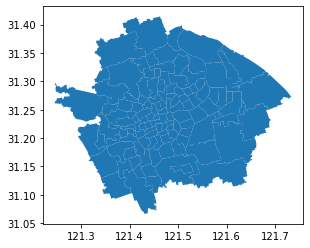

In [26]:
region.plot()

## reset the df index

In [10]:
df = df.reset_index()

In [11]:
df.head(1)

,index,BIKE_ID,DATA_TIME,LOCK_STATUS,LONGITUDE,LATITUDE,BIKE_ID_D,DATA_TIME_D,LOCK_STATUS_D,LONGITUDE_D,LATITUDE_D
0,0,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:35:02,0,121.489062,31.228411,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:40:15,1.0,121.483061,31.230273


In [12]:
len(df)

27116763

In [13]:
from shapely.geometry import Point

## filter the data in study areas

In [14]:
gpd.GeoDataFrame([[df['index'][0],Point(df['LONGITUDE'][0],df['LATITUDE'][0])],
                  [df['index'][1],Point(df['LONGITUDE'][1],df['LATITUDE'][1])],
                 ],columns=['index','geometry'],crs='epsg:4326')

,index,geometry
0,0,POINT (121.48906 31.22841)
1,1,POINT (121.48307 31.23027)


In [19]:
df_1 = gpd.GeoDataFrame([[df['index'][i],Point(df['LONGITUDE'][i],df['LATITUDE'][i])] for i in range(len(df))],
                 columns=['index','geometry'],crs='epsg:4326')

In [20]:
df_1.head()

,index,geometry
0,0,POINT (121.48906 31.22841)
1,1,POINT (121.48307 31.23027)
2,2,POINT (121.48467 31.22548)
3,3,POINT (121.43141 31.24462)
4,4,POINT (121.43640 31.23928)


In [21]:
df_1.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [27]:
df_1 = gpd.sjoin(df_1,region,op='within')

In [28]:
df_1.head()

,index,geometry,index_right,TownName
0,0,POINT (121.48906 31.22841),21,豫园街道
1,1,POINT (121.48307 31.23027),21,豫园街道
2,2,POINT (121.48467 31.22548),21,豫园街道
80,80,POINT (121.48247 31.23048),21,豫园街道
82,82,POINT (121.48256 31.23048),21,豫园街道


In [29]:
len(df_1)

22133452

In [31]:
df_2 = gpd.GeoDataFrame([[df['index'][i],Point(df['LONGITUDE_D'][i],df['LATITUDE_D'][i])] for i in range(len(df))],
                 columns=['index','geometry'],crs='epsg:4326')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
result = pd.read_csv('./data/OD/od_select.csv')

In [6]:
result.head(1)

,index,TownName_x,TownName_y,BIKE_ID,DATA_TIME,LOCK_STATUS,LONGITUDE,LATITUDE,BIKE_ID_D,DATA_TIME_D,LOCK_STATUS_D,LONGITUDE_D,LATITUDE_D
0,0,豫园街道,豫园街道,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:35:02,0,121.489062,31.228411,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:40:15,1.0,121.483061,31.230273


In [7]:
result.head(1)

,index,TownName_x,TownName_y,BIKE_ID,DATA_TIME,LOCK_STATUS,LONGITUDE,LATITUDE,BIKE_ID_D,DATA_TIME_D,LOCK_STATUS_D,LONGITUDE_D,LATITUDE_D
0,0,豫园街道,豫园街道,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:35:02,0,121.489062,31.228411,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:40:15,1.0,121.483061,31.230273


# 计算时间

In [8]:
result.columns

Index(['index', 'TownName_x', 'TownName_y', 'BIKE_ID', 'DATA_TIME',
       'LOCK_STATUS', 'LONGITUDE', 'LATITUDE', 'BIKE_ID_D', 'DATA_TIME_D',
       'LOCK_STATUS_D', 'LONGITUDE_D', 'LATITUDE_D'],
      dtype='object')

In [9]:
result['DATA_TIME'] = result['DATA_TIME'].astype('datetime64')
result['DATA_TIME_D'] = result['DATA_TIME_D'].astype('datetime64')

In [10]:
result['BIKE_TIME'] = result['DATA_TIME_D'] - result['DATA_TIME']

In [11]:
result.head(1)

,index,TownName_x,TownName_y,BIKE_ID,DATA_TIME,LOCK_STATUS,LONGITUDE,LATITUDE,BIKE_ID_D,DATA_TIME_D,LOCK_STATUS_D,LONGITUDE_D,LATITUDE_D,BIKE_TIME
0,0,豫园街道,豫园街道,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:35:02,0,121.489062,31.228411,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:40:15,1.0,121.483061,31.230273,0 days 00:05:13


In [12]:
result['BIKE_MINU'] = result['BIKE_TIME'] / np.timedelta64(1,'m')

In [13]:
result.head(1)

,index,TownName_x,TownName_y,BIKE_ID,DATA_TIME,LOCK_STATUS,LONGITUDE,LATITUDE,BIKE_ID_D,DATA_TIME_D,LOCK_STATUS_D,LONGITUDE_D,LATITUDE_D,BIKE_TIME,BIKE_MINU
0,0,豫园街道,豫园街道,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:35:02,0,121.489062,31.228411,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:40:15,1.0,121.483061,31.230273,0 days 00:05:13,5.216667


In [14]:
result['BIKE_MINU'] = result['BIKE_TIME'] / np.timedelta64(1,'m')

In [15]:
result.head(1)

,index,TownName_x,TownName_y,BIKE_ID,DATA_TIME,LOCK_STATUS,LONGITUDE,LATITUDE,BIKE_ID_D,DATA_TIME_D,LOCK_STATUS_D,LONGITUDE_D,LATITUDE_D,BIKE_TIME,BIKE_MINU
0,0,豫园街道,豫园街道,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:35:02,0,121.489062,31.228411,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:40:15,1.0,121.483061,31.230273,0 days 00:05:13,5.216667


# 计算距离

In [16]:
from math import radians, cos, sin, asin, sqrt
 
def haversine(lon1, lat1, lon2, lat2): # 经度1，纬度1，经度2，纬度2 （十进制度数）
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # 将十进制度数转化为弧度
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
 
    # haversine公式
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # 地球平均半径，单位为公里
    return c * r * 1000

In [17]:
result.columns

Index(['index', 'TownName_x', 'TownName_y', 'BIKE_ID', 'DATA_TIME',
       'LOCK_STATUS', 'LONGITUDE', 'LATITUDE', 'BIKE_ID_D', 'DATA_TIME_D',
       'LOCK_STATUS_D', 'LONGITUDE_D', 'LATITUDE_D', 'BIKE_TIME', 'BIKE_MINU'],
      dtype='object')

In [18]:
result['DISTANCE'] = result[['LONGITUDE', 'LATITUDE','LONGITUDE_D', 'LATITUDE_D']].\
apply(lambda x:haversine(x[0],x[1],x[2],x[3]),axis=1)

In [19]:
result.head(1)

,index,TownName_x,TownName_y,BIKE_ID,DATA_TIME,LOCK_STATUS,LONGITUDE,LATITUDE,BIKE_ID_D,DATA_TIME_D,LOCK_STATUS_D,LONGITUDE_D,LATITUDE_D,BIKE_TIME,BIKE_MINU,DISTANCE
0,0,豫园街道,豫园街道,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:35:02,0,121.489062,31.228411,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:40:15,1.0,121.483061,31.230273,0 days 00:05:13,5.216667,606.964311


# 记录工作日、周末

In [20]:
result['DATA_TIME'][0].day in [2,26,67]

True

In [21]:
result['DATE_TYPE'] = result['DATA_TIME'].apply(lambda x:'weekend' if x.day in [26,1,2,8] else 'weekday')

In [22]:
result.groupby(by='DATE_TYPE').count()

,index,TownName_x,TownName_y,BIKE_ID,DATA_TIME,LOCK_STATUS,LONGITUDE,LATITUDE,BIKE_ID_D,DATA_TIME_D,LOCK_STATUS_D,LONGITUDE_D,LATITUDE_D,BIKE_TIME,BIKE_MINU,DISTANCE
DATE_TYPE,,,,,,,,,,,,,,,,
weekday,16787229,16787229,16787229,16787229,16787229,16787229,16787229,16787229,16787229,16787229,16787229,16787229,16787229,16787229,16787229,16787229
weekend,5085873,5085873,5085873,5085873,5085873,5085873,5085873,5085873,5085873,5085873,5085873,5085873,5085873,5085873,5085873,5085873


In [23]:
result.head()

,index,TownName_x,TownName_y,BIKE_ID,DATA_TIME,LOCK_STATUS,LONGITUDE,LATITUDE,BIKE_ID_D,DATA_TIME_D,LOCK_STATUS_D,LONGITUDE_D,LATITUDE_D,BIKE_TIME,BIKE_MINU,DISTANCE,DATE_TYPE
0,0,豫园街道,豫园街道,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:35:02,0,121.489062,31.228411,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:40:15,1.0,121.483061,31.230273,0 days 00:05:13,5.216667,606.964311,weekend
1,1,豫园街道,豫园街道,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:42:57,0,121.483071,31.230274,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:49:23,1.0,121.484999,31.225415,0 days 00:06:26,6.433333,570.595095,weekend
2,2,豫园街道,豫园街道,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 16:16:26,0,121.484666,31.225481,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 16:27:53,1.0,121.481725,31.229590,0 days 00:11:27,11.450000,535.663968,weekend
3,80,豫园街道,外滩街道,713ED78F8E243233E0533C0BA8C09291,2018-08-26 07:14:40,0,121.482469,31.230481,713ED78F8E243233E0533C0BA8C09291,2018-08-26 07:20:42,1.0,121.489712,31.231710,0 days 00:06:02,6.033333,702.111956,weekend
4,82,豫园街道,外滩街道,713ED78F8E243233E0533C0BA8C09291,2018-08-26 09:33:23,0,121.482560,31.230481,713ED78F8E243233E0533C0BA8C09291,2018-08-26 09:43:27,1.0,121.488340,31.233890,0 days 00:10:04,10.066667,667.594262,weekend


# 绘图

## fig2a

In [24]:
vl = result[result['DISTANCE']<=20000]['DISTANCE']

<AxesSubplot:xlabel='DISTANCE', ylabel='Probability'>

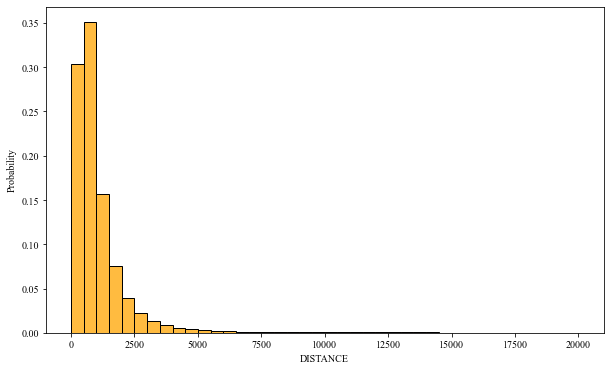

In [25]:
import seaborn as sns

plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(10,6))
sns.histplot(vl,binwidth=500,stat='probability',color='orange')

## fig2b

In [26]:
result.columns

Index(['index', 'TownName_x', 'TownName_y', 'BIKE_ID', 'DATA_TIME',
       'LOCK_STATUS', 'LONGITUDE', 'LATITUDE', 'BIKE_ID_D', 'DATA_TIME_D',
       'LOCK_STATUS_D', 'LONGITUDE_D', 'LATITUDE_D', 'BIKE_TIME', 'BIKE_MINU',
       'DISTANCE', 'DATE_TYPE'],
      dtype='object')

In [27]:
vl2 = result[result['BIKE_MINU']<=120]['BIKE_MINU']

<AxesSubplot:xlabel='BIKE_MINU', ylabel='Probability'>

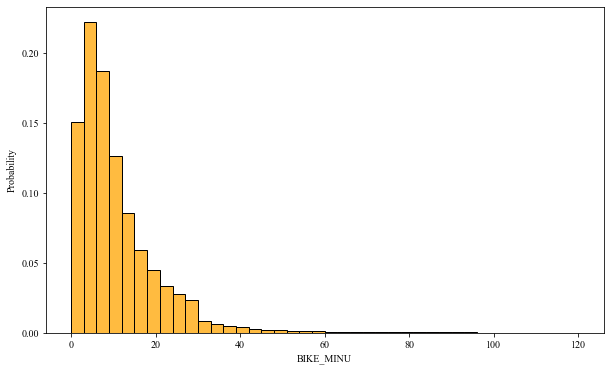

In [28]:
import seaborn as sns

plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(10,6))
sns.histplot(vl2,binwidth=3,stat='probability',color='orange')

## fig2c

In [29]:
result.head(1)

,index,TownName_x,TownName_y,BIKE_ID,DATA_TIME,LOCK_STATUS,LONGITUDE,LATITUDE,BIKE_ID_D,DATA_TIME_D,LOCK_STATUS_D,LONGITUDE_D,LATITUDE_D,BIKE_TIME,BIKE_MINU,DISTANCE,DATE_TYPE
0,0,豫园街道,豫园街道,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:35:02,0,121.489062,31.228411,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:40:15,1.0,121.483061,31.230273,0 days 00:05:13,5.216667,606.964311,weekend


In [30]:
result['HOUR'] = result['DATA_TIME'].dt.hour

In [31]:
result.head(1)

,index,TownName_x,TownName_y,BIKE_ID,DATA_TIME,LOCK_STATUS,LONGITUDE,LATITUDE,BIKE_ID_D,DATA_TIME_D,LOCK_STATUS_D,LONGITUDE_D,LATITUDE_D,BIKE_TIME,BIKE_MINU,DISTANCE,DATE_TYPE,HOUR
0,0,豫园街道,豫园街道,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:35:02,0,121.489062,31.228411,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:40:15,1.0,121.483061,31.230273,0 days 00:05:13,5.216667,606.964311,weekend,8


In [33]:
vl = result.pivot_table(index='HOUR',columns='DATE_TYPE',values='BIKE_ID',aggfunc='count')

In [34]:
vl['weekday'] = vl['weekday'] / 10 / 10000
vl['weekend'] = vl['weekend'] / 4 / 10000

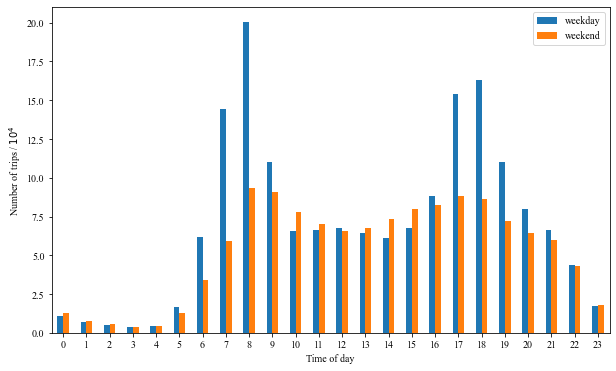

In [35]:
import seaborn as sns

vl.plot(kind='bar',figsize=(10,6))
plt.xticks(rotation=0)
plt.legend(title='')
plt.xlabel('Time of day')
plt.ylabel('Number of trips / $10^4$')
plt.show()

## fig2d

In [36]:
vl = result.groupby(by='BIKE_ID').count()[['DATA_TIME']]

In [37]:
vl.head()

,DATA_TIME
BIKE_ID,
713ED78F8DC23233E0533C0BA8C09291,53
713ED78F8DC33233E0533C0BA8C09291,130
713ED78F8DC43233E0533C0BA8C09291,52
713ED78F8DC53233E0533C0BA8C09291,106
713ED78F8DC83233E0533C0BA8C09291,28


<AxesSubplot:xlabel='DATA_TIME', ylabel='Probability'>

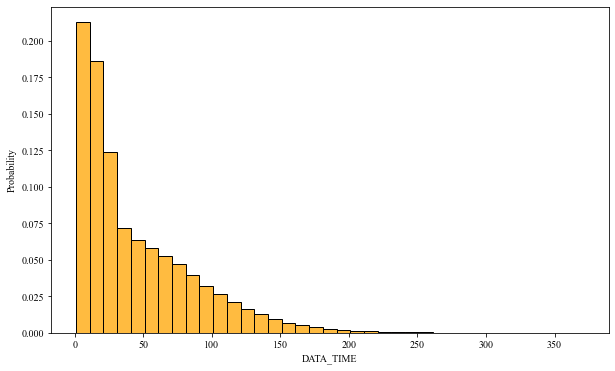

In [38]:
import seaborn as sns

plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(10,6))
sns.histplot(vl['DATA_TIME'],binwidth=10,stat='probability',color='orange')

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# 读取数据

In [40]:
result = pd.read_csv('./data/OD/od_select.csv')

In [41]:
result.head()

,index,TownName_x,TownName_y,BIKE_ID,DATA_TIME,LOCK_STATUS,LONGITUDE,LATITUDE,BIKE_ID_D,DATA_TIME_D,LOCK_STATUS_D,LONGITUDE_D,LATITUDE_D
0,0,豫园街道,豫园街道,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:35:02,0,121.489062,31.228411,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:40:15,1.0,121.483061,31.230273
1,1,豫园街道,豫园街道,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:42:57,0,121.483071,31.230274,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:49:23,1.0,121.484999,31.225415
2,2,豫园街道,豫园街道,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 16:16:26,0,121.484666,31.225481,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 16:27:53,1.0,121.481725,31.229590
3,80,豫园街道,外滩街道,713ED78F8E243233E0533C0BA8C09291,2018-08-26 07:14:40,0,121.482469,31.230481,713ED78F8E243233E0533C0BA8C09291,2018-08-26 07:20:42,1.0,121.489712,31.231710
4,82,豫园街道,外滩街道,713ED78F8E243233E0533C0BA8C09291,2018-08-26 09:33:23,0,121.482560,31.230481,713ED78F8E243233E0533C0BA8C09291,2018-08-26 09:43:27,1.0,121.488340,31.233890


# 筛选数据

In [42]:
id_lst = result.groupby(by='BIKE_ID').count()['DATA_TIME']

In [43]:
len(id_lst)

495208

In [44]:
id_lst.head()

BIKE_ID
713ED78F8DC23233E0533C0BA8C09291     53
713ED78F8DC33233E0533C0BA8C09291    130
713ED78F8DC43233E0533C0BA8C09291     52
713ED78F8DC53233E0533C0BA8C09291    106
713ED78F8DC83233E0533C0BA8C09291     28
Name: DATA_TIME, dtype: int64

In [45]:
len(id_lst[id_lst >= 14])

358175

In [46]:
result2 = result[result['BIKE_ID'].isin(id_lst[id_lst >= 14].index)]

In [47]:
len(result)

21873102

In [48]:
result2.to_csv('./data/OD/od_select14.csv',index=False)

# 提取TOB数据

In [49]:
res = pd.concat([result2,result2.shift(-1).rename(columns=lambda x:x+'_nt')],axis=1)

In [50]:
res.columns

Index(['index', 'TownName_x', 'TownName_y', 'BIKE_ID', 'DATA_TIME',
       'LOCK_STATUS', 'LONGITUDE', 'LATITUDE', 'BIKE_ID_D', 'DATA_TIME_D',
       'LOCK_STATUS_D', 'LONGITUDE_D', 'LATITUDE_D', 'index_nt',
       'TownName_x_nt', 'TownName_y_nt', 'BIKE_ID_nt', 'DATA_TIME_nt',
       'LOCK_STATUS_nt', 'LONGITUDE_nt', 'LATITUDE_nt', 'BIKE_ID_D_nt',
       'DATA_TIME_D_nt', 'LOCK_STATUS_D_nt', 'LONGITUDE_D_nt',
       'LATITUDE_D_nt'],
      dtype='object')

In [51]:
len(res[res['BIKE_ID_nt'] == res['BIKE_ID']])

12396818

In [52]:
len(res[res['BIKE_ID_nt'] == res['BIKE_ID']])

12396818

In [53]:
res.columns

Index(['index', 'TownName_x', 'TownName_y', 'BIKE_ID', 'DATA_TIME',
       'LOCK_STATUS', 'LONGITUDE', 'LATITUDE', 'BIKE_ID_D', 'DATA_TIME_D',
       'LOCK_STATUS_D', 'LONGITUDE_D', 'LATITUDE_D', 'index_nt',
       'TownName_x_nt', 'TownName_y_nt', 'BIKE_ID_nt', 'DATA_TIME_nt',
       'LOCK_STATUS_nt', 'LONGITUDE_nt', 'LATITUDE_nt', 'BIKE_ID_D_nt',
       'DATA_TIME_D_nt', 'LOCK_STATUS_D_nt', 'LONGITUDE_D_nt',
       'LATITUDE_D_nt'],
      dtype='object')

In [54]:
len(res[res['BIKE_ID_nt'] == res['BIKE_ID']])

12396818

In [55]:
len(res[res['BIKE_ID_nt'] == res['BIKE_ID']])

12396818

# 计算时间、距离

## 计算时间

In [56]:
res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20983905 entries, 0 to 21873101
Data columns (total 26 columns):
 #   Column            Dtype  
---  ------            -----  
 0   index             int64  
 1   TownName_x        object 
 2   TownName_y        object 
 3   BIKE_ID           object 
 4   DATA_TIME         object 
 5   LOCK_STATUS       int64  
 6   LONGITUDE         float64
 7   LATITUDE          float64
 8   BIKE_ID_D         object 
 9   DATA_TIME_D       object 
 10  LOCK_STATUS_D     float64
 11  LONGITUDE_D       float64
 12  LATITUDE_D        float64
 13  index_nt          float64
 14  TownName_x_nt     object 
 15  TownName_y_nt     object 
 16  BIKE_ID_nt        object 
 17  DATA_TIME_nt      object 
 18  LOCK_STATUS_nt    float64
 19  LONGITUDE_nt      float64
 20  LATITUDE_nt       float64
 21  BIKE_ID_D_nt      object 
 22  DATA_TIME_D_nt    object 
 23  LOCK_STATUS_D_nt  float64
 24  LONGITUDE_D_nt    float64
 25  LATITUDE_D_nt     float64
dtypes: float64(1

In [57]:
res['DATA_TIME_D'] = res['DATA_TIME_D'].astype('datetime64')
res['DATA_TIME_nt'] = res['DATA_TIME_nt'].astype('datetime64')

In [58]:
res['TOB_TIME'] = res['DATA_TIME_nt'] - res['DATA_TIME_D']

In [59]:
res.head()

,index,TownName_x,TownName_y,BIKE_ID,DATA_TIME,LOCK_STATUS,LONGITUDE,LATITUDE,BIKE_ID_D,DATA_TIME_D,...,DATA_TIME_nt,LOCK_STATUS_nt,LONGITUDE_nt,LATITUDE_nt,BIKE_ID_D_nt,DATA_TIME_D_nt,LOCK_STATUS_D_nt,LONGITUDE_D_nt,LATITUDE_D_nt,TOB_TIME
0,0,豫园街道,豫园街道,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:35:02,0,121.489062,31.228411,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:40:15,...,2018-08-26 08:42:57,0.0,121.483071,31.230274,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:49:23,1.0,121.484999,31.225415,0 days 00:02:42
1,1,豫园街道,豫园街道,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:42:57,0,121.483071,31.230274,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:49:23,...,2018-08-26 16:16:26,0.0,121.484666,31.225481,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 16:27:53,1.0,121.481725,31.229590,0 days 07:27:03
2,2,豫园街道,豫园街道,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 16:16:26,0,121.484666,31.225481,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 16:27:53,...,2018-08-26 07:14:40,0.0,121.482469,31.230481,713ED78F8E243233E0533C0BA8C09291,2018-08-26 07:20:42,1.0,121.489712,31.231710,-1 days +14:46:47
3,80,豫园街道,外滩街道,713ED78F8E243233E0533C0BA8C09291,2018-08-26 07:14:40,0,121.482469,31.230481,713ED78F8E243233E0533C0BA8C09291,2018-08-26 07:20:42,...,2018-08-26 09:33:23,0.0,121.482560,31.230481,713ED78F8E243233E0533C0BA8C09291,2018-08-26 09:43:27,1.0,121.488340,31.233890,0 days 02:12:41
4,82,豫园街道,外滩街道,713ED78F8E243233E0533C0BA8C09291,2018-08-26 09:33:23,0,121.482560,31.230481,713ED78F8E243233E0533C0BA8C09291,2018-08-26 09:43:27,...,2018-08-26 20:33:20,0.0,121.483076,31.230754,713ED78F8E4D3233E0533C0BA8C09291,2018-08-26 20:40:58,1.0,121.486600,31.229916,0 days 10:49:53


## 计算距离

In [60]:
from math import radians, cos, sin, asin, sqrt
 
def haversine(lon1, lat1, lon2, lat2): # 经度1，纬度1，经度2，纬度2 （十进制度数）
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # 将十进制度数转化为弧度
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
 
    # haversine公式
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # 地球平均半径，单位为公里
    return c * r * 1000

In [61]:
res.columns

Index(['index', 'TownName_x', 'TownName_y', 'BIKE_ID', 'DATA_TIME',
       'LOCK_STATUS', 'LONGITUDE', 'LATITUDE', 'BIKE_ID_D', 'DATA_TIME_D',
       'LOCK_STATUS_D', 'LONGITUDE_D', 'LATITUDE_D', 'index_nt',
       'TownName_x_nt', 'TownName_y_nt', 'BIKE_ID_nt', 'DATA_TIME_nt',
       'LOCK_STATUS_nt', 'LONGITUDE_nt', 'LATITUDE_nt', 'BIKE_ID_D_nt',
       'DATA_TIME_D_nt', 'LOCK_STATUS_D_nt', 'LONGITUDE_D_nt', 'LATITUDE_D_nt',
       'TOB_TIME'],
      dtype='object')

In [62]:
res['TOB_DISTANCE'] = res[['LONGITUDE_nt', 'LATITUDE_nt','LONGITUDE_D', 'LATITUDE_D']].\
apply(lambda x:haversine(x[0],x[1],x[2],x[3]),axis=1)

In [63]:
res.head()

,index,TownName_x,TownName_y,BIKE_ID,DATA_TIME,LOCK_STATUS,LONGITUDE,LATITUDE,BIKE_ID_D,DATA_TIME_D,...,LOCK_STATUS_nt,LONGITUDE_nt,LATITUDE_nt,BIKE_ID_D_nt,DATA_TIME_D_nt,LOCK_STATUS_D_nt,LONGITUDE_D_nt,LATITUDE_D_nt,TOB_TIME,TOB_DISTANCE
0,0,豫园街道,豫园街道,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:35:02,0,121.489062,31.228411,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:40:15,...,0.0,121.483071,31.230274,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:49:23,1.0,121.484999,31.225415,0 days 00:02:42,0.967663
1,1,豫园街道,豫园街道,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:42:57,0,121.483071,31.230274,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:49:23,...,0.0,121.484666,31.225481,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 16:27:53,1.0,121.481725,31.229590,0 days 07:27:03,32.504207
2,2,豫园街道,豫园街道,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 16:16:26,0,121.484666,31.225481,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 16:27:53,...,0.0,121.482469,31.230481,713ED78F8E243233E0533C0BA8C09291,2018-08-26 07:20:42,1.0,121.489712,31.231710,-1 days +14:46:47,121.743393
3,80,豫园街道,外滩街道,713ED78F8E243233E0533C0BA8C09291,2018-08-26 07:14:40,0,121.482469,31.230481,713ED78F8E243233E0533C0BA8C09291,2018-08-26 07:20:42,...,0.0,121.482560,31.230481,713ED78F8E243233E0533C0BA8C09291,2018-08-26 09:43:27,1.0,121.488340,31.233890,0 days 02:12:41,693.591510
4,82,豫园街道,外滩街道,713ED78F8E243233E0533C0BA8C09291,2018-08-26 09:33:23,0,121.482560,31.230481,713ED78F8E243233E0533C0BA8C09291,2018-08-26 09:43:27,...,0.0,121.483076,31.230754,713ED78F8E4D3233E0533C0BA8C09291,2018-08-26 20:40:58,1.0,121.486600,31.229916,0 days 10:49:53,610.004728


# 绘制图3

In [64]:
fig3 = res[res['TOB_DISTANCE'] <= 500]

<AxesSubplot:xlabel='TOB_DISTANCE', ylabel='Count'>

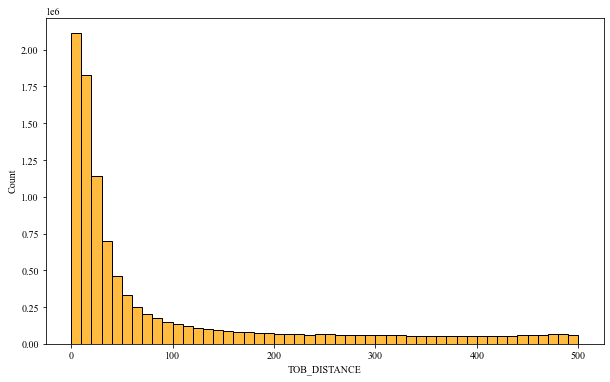

In [65]:
import seaborn as sns

plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(10,6))
sns.histplot(fig3['TOB_DISTANCE'],binwidth=10,color='orange')

# 绘制图4

In [66]:
res['TOB_MINU'] = res['TOB_TIME'] / np.timedelta64(1,'m')

In [67]:
res.head()

,index,TownName_x,TownName_y,BIKE_ID,DATA_TIME,LOCK_STATUS,LONGITUDE,LATITUDE,BIKE_ID_D,DATA_TIME_D,...,LONGITUDE_nt,LATITUDE_nt,BIKE_ID_D_nt,DATA_TIME_D_nt,LOCK_STATUS_D_nt,LONGITUDE_D_nt,LATITUDE_D_nt,TOB_TIME,TOB_DISTANCE,TOB_MINU
0,0,豫园街道,豫园街道,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:35:02,0,121.489062,31.228411,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:40:15,...,121.483071,31.230274,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:49:23,1.0,121.484999,31.225415,0 days 00:02:42,0.967663,2.700000
1,1,豫园街道,豫园街道,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:42:57,0,121.483071,31.230274,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:49:23,...,121.484666,31.225481,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 16:27:53,1.0,121.481725,31.229590,0 days 07:27:03,32.504207,447.050000
2,2,豫园街道,豫园街道,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 16:16:26,0,121.484666,31.225481,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 16:27:53,...,121.482469,31.230481,713ED78F8E243233E0533C0BA8C09291,2018-08-26 07:20:42,1.0,121.489712,31.231710,-1 days +14:46:47,121.743393,-553.216667
3,80,豫园街道,外滩街道,713ED78F8E243233E0533C0BA8C09291,2018-08-26 07:14:40,0,121.482469,31.230481,713ED78F8E243233E0533C0BA8C09291,2018-08-26 07:20:42,...,121.482560,31.230481,713ED78F8E243233E0533C0BA8C09291,2018-08-26 09:43:27,1.0,121.488340,31.233890,0 days 02:12:41,693.591510,132.683333
4,82,豫园街道,外滩街道,713ED78F8E243233E0533C0BA8C09291,2018-08-26 09:33:23,0,121.482560,31.230481,713ED78F8E243233E0533C0BA8C09291,2018-08-26 09:43:27,...,121.483076,31.230754,713ED78F8E4D3233E0533C0BA8C09291,2018-08-26 20:40:58,1.0,121.486600,31.229916,0 days 10:49:53,610.004728,649.883333


In [68]:
fig4 = res[res['TOB_DISTANCE'] <= 50]
fig4 = fig4[fig4['TOB_MINU'] > 0]

(0.0, 360.0)

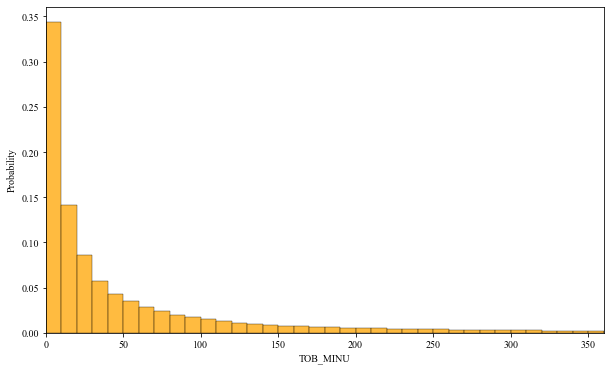

In [69]:
import seaborn as sns

plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(10,6))
sns.histplot(fig4['TOB_MINU'],stat='probability',binwidth=10,color='orange')
plt.xlim([0,360])

# 绘制图5a

In [70]:
fig5 = fig4.copy()

In [71]:
fig5.head(1)

,index,TownName_x,TownName_y,BIKE_ID,DATA_TIME,LOCK_STATUS,LONGITUDE,LATITUDE,BIKE_ID_D,DATA_TIME_D,...,LONGITUDE_nt,LATITUDE_nt,BIKE_ID_D_nt,DATA_TIME_D_nt,LOCK_STATUS_D_nt,LONGITUDE_D_nt,LATITUDE_D_nt,TOB_TIME,TOB_DISTANCE,TOB_MINU
0,0,豫园街道,豫园街道,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:35:02,0,121.489062,31.228411,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:40:15,...,121.483071,31.230274,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:49:23,1.0,121.484999,31.225415,0 days 00:02:42,0.967663,2.7


In [72]:
fig5.groupby(by='TownName_y')['TOB_MINU'].median()

TownName_y
七宝镇       26.183333
三林镇       32.450000
上钢新村街道    33.600000
东明路街道     30.733333
临汾路街道     18.683333
            ...    
高东镇       46.716667
高境镇       18.758333
高桥镇       41.550000
高行镇       37.916667
龙华街道      29.333333
Name: TOB_MINU, Length: 117, dtype: float64

In [73]:
fig5a = fig5.groupby(by='TownName_y')['TOB_MINU'].median()

In [74]:
fig5a

TownName_y
七宝镇       26.183333
三林镇       32.450000
上钢新村街道    33.600000
东明路街道     30.733333
临汾路街道     18.683333
            ...    
高东镇       46.716667
高境镇       18.758333
高桥镇       41.550000
高行镇       37.916667
龙华街道      29.333333
Name: TOB_MINU, Length: 117, dtype: float64

<AxesSubplot:xlabel='TOB_MINU', ylabel='Count'>

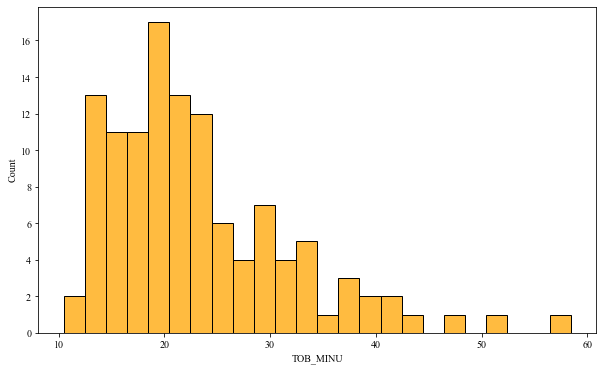

In [75]:
import seaborn as sns

plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(10,6))
sns.histplot(fig5a,binwidth=2,color='orange')

# 绘制图5b

In [76]:
import geopandas as gpd

region = gpd.read_file('./data/shpData/basic_shp/shanghai_select_town_wgs84.shp')

In [77]:
region.head()

,TownName,geometry
0,大场镇,"POLYGON ((121.40022 31.34036, 121.40017 31.339..."
1,顾村镇,"POLYGON ((121.43427 31.34768, 121.43350 31.347..."
2,高境镇,"POLYGON ((121.49447 31.33941, 121.49103 31.334..."
3,张庙街道,"POLYGON ((121.45938 31.32963, 121.45780 31.329..."
4,杨行镇,"POLYGON ((121.47079 31.39551, 121.47110 31.395..."


In [78]:
fig5a.reset_index()

,TownName_y,TOB_MINU
0,七宝镇,26.183333
1,三林镇,32.450000
2,上钢新村街道,33.600000
3,东明路街道,30.733333
4,临汾路街道,18.683333
...,...,...
112,高东镇,46.716667
113,高境镇,18.758333
114,高桥镇,41.550000
115,高行镇,37.916667


In [79]:
fig5b = region.merge(fig5a.reset_index(),left_on='TownName',right_on='TownName_y')

In [80]:
fig5b.head()

,TownName,geometry,TownName_y,TOB_MINU
0,大场镇,"POLYGON ((121.40022 31.34036, 121.40017 31.339...",大场镇,18.616667
1,顾村镇,"POLYGON ((121.43427 31.34768, 121.43350 31.347...",顾村镇,37.750000
2,高境镇,"POLYGON ((121.49447 31.33941, 121.49103 31.334...",高境镇,18.758333
3,张庙街道,"POLYGON ((121.45938 31.32963, 121.45780 31.329...",张庙街道,23.916667
4,杨行镇,"POLYGON ((121.47079 31.39551, 121.47110 31.395...",杨行镇,33.600000


In [81]:
rings = gpd.read_file('./data/shpData/basic_shp/shanghai_rings.shp')

<AxesSubplot:>

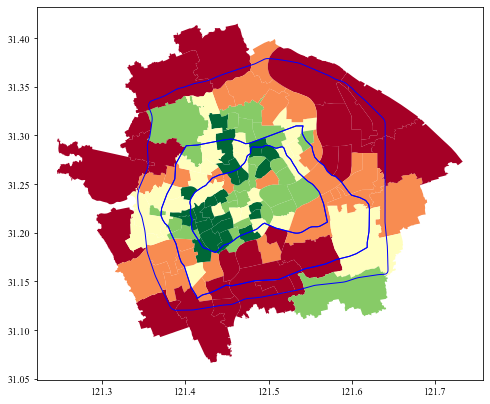

In [82]:
fig,ax = plt.subplots(figsize=(8,8))
fig5b.plot(ax=ax,column='TOB_MINU',scheme='quantiles',k=5,cmap='RdYlGn_r')
rings.plot(ax=ax,facecolor='none',edgecolor='blue')

In [83]:
import pandas as pd
import numpy as np

import geopandas as gpd

import matplotlib.pyplot as plt

In [235]:
use_types = ['汽车服务', '汽车销售', '汽车维修', '摩托车服务', '餐饮服务', '购物服务', '生活服务', '体育休闲服务',
           '医疗保健服务', '住宿服务', '风景名胜', '商务住宅', '政府机构及社会团体', '科教文化服务', '交通设施服务',
           '金融保险服务', '公司企业',]

In [236]:
poi_name = use_types[0]

poi = gpd.read_file('./data/POI/use_poi/poi_shp/2018_{}.shp'.format(poi_name))

In [237]:
poi_name = use_types[0]

poi = gpd.read_file('./data/POI/use_poi/poi_shp/2018_{}.shp'.format(poi_name))

In [238]:
poi.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [285]:
region = gpd.read_file('./data/shpData/basic_shp/shanghai_select_town_wgs84x.shp')

<AxesSubplot:>

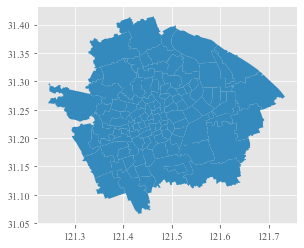

In [286]:
region.plot()

In [275]:
region = gpd.GeoDataFrame({'geometry':[region['geometry'].unary_union]},crs='epsg:3857')

In [289]:
region2 = region.set_crs(epsg='4326')


In [241]:
region.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [242]:
df_poi = gpd.sjoin(region,poi,op='contains')

In [243]:
region['area'] = region['geometry'].area

<ipython-input-243-5b8cb015d9c5>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  region['area'] = region['geometry'].area


In [92]:
df_poi

,TownName,geometry,index_right,name
0,大场镇,"POLYGON ((121.40022 31.34036, 121.40017 31.339...",9556,奇瑞新能源汽车充电站(新村路)
0,大场镇,"POLYGON ((121.40022 31.34036, 121.40017 31.339...",20034,安悦充电汽车充电站(上海开放大学站)
0,大场镇,"POLYGON ((121.40022 31.34036, 121.40017 31.339...",22296,上海崭然建筑材料有限公司
0,大场镇,"POLYGON ((121.40022 31.34036, 121.40017 31.339...",9698,优玛膜授权施工中心
0,大场镇,"POLYGON ((121.40022 31.34036, 121.40017 31.339...",16625,美国龙膜授权施工中心
...,...,...,...,...
116,外高桥保税区,"POLYGON ((121.60334 31.33382, 121.60382 31.333...",18006,上海繁博汽车装潢有限公司浦东分公司
116,外高桥保税区,"POLYGON ((121.60334 31.33382, 121.60382 31.333...",17532,途虎养车(浦东富特西三路店)
116,外高桥保税区,"POLYGON ((121.60334 31.33382, 121.60382 31.333...",1574,中国石油(英伦加油站)
116,外高桥保税区,"POLYGON ((121.60334 31.33382, 121.60382 31.333...",5528,安悦充电汽车充电站(新灵路108号)


In [93]:
df_poi.groupby(by='TownName').count()[['name']].rename(columns={'name':poi_name})

,汽车服务
TownName,
七宝镇,512
三林镇,308
上钢新村街道,65
东明路街道,37
临汾路街道,71
...,...
高东镇,67
高境镇,129
高桥镇,334


# 定义函数，对17个POI执行处理

In [259]:
def concat(poi_name):
    poi = gpd.read_file('./data/POI/use_poi/poi_shp/2018_{}.shp'.format(poi_name))
    df_poi = gpd.sjoin(region,poi,op='contains')
    df_poi = df_poi.groupby(by='TownName').count()[['name']].rename(columns={'name':poi_name})
    return df_poi

In [260]:
poi_all = pd.concat([concat(poi_name) for poi_name in use_types],axis=1)

In [261]:
poi_all

,汽车服务,汽车销售,汽车维修,摩托车服务,餐饮服务,购物服务,生活服务,体育休闲服务,医疗保健服务,住宿服务,风景名胜,商务住宅,政府机构及社会团体,科教文化服务,交通设施服务,金融保险服务,公司企业
七宝镇,512,120.0000,138.0000,35.0000,2765,7339,2590,523,282,199,94.0000,1221,296,650,993,261,3478
三林镇,308,18.0000,147.0000,40.0000,2392,6854,2467,445,320,244,47.0000,645,288,549,878,244,2514
上钢新村街道,65,17.0000,13.0000,4.0000,589,1185,646,129,90,63,25.0000,170,177,214,266,89,457
东明路街道,37,1.0000,16.0000,9.0000,805,1548,840,132,144,59,9.0000,282,137,138,258,81,220
临汾路街道,71,10.0000,21.0000,4.0000,305,723,481,66,84,27,9.0000,195,106,95,97,69,140
五角场街道,105,18.0000,18.0000,4.0000,2418,4197,2020,540,264,196,24.0000,676,280,1276,1131,377,2492
五角场镇,226,49.0000,74.0000,10.0000,1250,2063,1381,341,265,126,33.0000,373,244,425,539,181,1228
五里桥街道,32,1.0000,2.0000,2.0000,637,1027,800,148,117,73,12.0000,277,186,252,334,182,1300
仙霞新村街道,27,3.0000,6.0000,2.0000,850,1169,859,246,84,62,10.0000,228,186,252,327,138,740
共和新路街道,51,4.0000,17.0000,6.0000,846,1609,935,161,83,138,11.0000,311,178,240,436,104,1256


In [262]:
poi_all.isnull().sum()

汽车服务          0
汽车销售          4
汽车维修          2
摩托车服务        18
餐饮服务          0
购物服务          0
生活服务          0
体育休闲服务        0
医疗保健服务        0
住宿服务          0
风景名胜          1
商务住宅          0
政府机构及社会团体     0
科教文化服务        0
交通设施服务        0
金融保险服务        0
公司企业          0
dtype: int64

In [263]:
poi_all = poi_all.fillna(0)

In [264]:
poi_all.columns

Index(['汽车服务', '汽车销售', '汽车维修', '摩托车服务', '餐饮服务', '购物服务', '生活服务', '体育休闲服务',
       '医疗保健服务', '住宿服务', '风景名胜', '商务住宅', '政府机构及社会团体', '科教文化服务', '交通设施服务',
       '金融保险服务', '公司企业'],
      dtype='object')

In [265]:
cols = poi_all.columns[:]

poi_all['count'] = 0
for i in cols:
    poi_all['count'] = poi_all[i] + poi_all['count']

In [266]:
poi_all

,汽车服务,汽车销售,汽车维修,摩托车服务,餐饮服务,购物服务,生活服务,体育休闲服务,医疗保健服务,住宿服务,风景名胜,商务住宅,政府机构及社会团体,科教文化服务,交通设施服务,金融保险服务,公司企业,count
七宝镇,512,120.0000,138.0000,35.0000,2765,7339,2590,523,282,199,94.0000,1221,296,650,993,261,3478,"21,496.0000"
三林镇,308,18.0000,147.0000,40.0000,2392,6854,2467,445,320,244,47.0000,645,288,549,878,244,2514,"18,400.0000"
上钢新村街道,65,17.0000,13.0000,4.0000,589,1185,646,129,90,63,25.0000,170,177,214,266,89,457,"4,199.0000"
东明路街道,37,1.0000,16.0000,9.0000,805,1548,840,132,144,59,9.0000,282,137,138,258,81,220,"4,716.0000"
临汾路街道,71,10.0000,21.0000,4.0000,305,723,481,66,84,27,9.0000,195,106,95,97,69,140,"2,503.0000"
五角场街道,105,18.0000,18.0000,4.0000,2418,4197,2020,540,264,196,24.0000,676,280,1276,1131,377,2492,"16,036.0000"
五角场镇,226,49.0000,74.0000,10.0000,1250,2063,1381,341,265,126,33.0000,373,244,425,539,181,1228,"8,808.0000"
五里桥街道,32,1.0000,2.0000,2.0000,637,1027,800,148,117,73,12.0000,277,186,252,334,182,1300,"5,382.0000"
仙霞新村街道,27,3.0000,6.0000,2.0000,850,1169,859,246,84,62,10.0000,228,186,252,327,138,740,"5,189.0000"
共和新路街道,51,4.0000,17.0000,6.0000,846,1609,935,161,83,138,11.0000,311,178,240,436,104,1256,"6,386.0000"


In [267]:
region

,TownName,geometry,area
0,大场镇,"POLYGON ((121.40022 31.34036, 121.40017 31.339...",0.0030
1,顾村镇,"POLYGON ((121.43427 31.34768, 121.43350 31.347...",0.0040
2,高境镇,"POLYGON ((121.49447 31.33941, 121.49103 31.334...",0.0007
3,张庙街道,"POLYGON ((121.45938 31.32963, 121.45780 31.329...",0.0005
4,杨行镇,"POLYGON ((121.47079 31.39551, 121.47110 31.395...",0.0037
5,庙行镇,"POLYGON ((121.44069 31.32503, 121.44153 31.323...",0.0006
6,淞南镇,"POLYGON ((121.50548 31.35756, 121.50754 31.356...",0.0013
7,宝山城市工业园区,"POLYGON ((121.35850 31.30480, 121.35728 31.304...",0.0005
8,吴淞街道,"POLYGON ((121.50818 31.39678, 121.50805 31.394...",0.0009
9,嘉兴路街道,"POLYGON ((121.50208 31.27255, 121.50204 31.271...",0.0002


In [268]:
poi_all = pd.merge(poi_all,region,left_on='index',right_on='TownName')

KeyError: 'index'

# 计算每一个POI的比例


In [102]:
poi_all.columns

Index(['汽车服务', '汽车销售', '汽车维修', '摩托车服务', '餐饮服务', '购物服务', '生活服务', '体育休闲服务',
       '医疗保健服务', '住宿服务', '风景名胜', '商务住宅', '政府机构及社会团体', '科教文化服务', '交通设施服务',
       '金融保险服务', '公司企业', 'count'],
      dtype='object')

In [103]:
for i in poi_all.columns[:-1]:
    poi_all[i] = poi_all[i] / poi_all['count']

In [104]:
poi_all.head()

,汽车服务,汽车销售,汽车维修,摩托车服务,餐饮服务,购物服务,生活服务,体育休闲服务,医疗保健服务,住宿服务,风景名胜,商务住宅,政府机构及社会团体,科教文化服务,交通设施服务,金融保险服务,公司企业,count
七宝镇,0.023818,0.005582,0.006420,0.001628,0.128629,0.341412,0.120488,0.024330,0.013119,0.009258,0.004373,0.056801,0.013770,0.030238,0.046195,0.012142,0.161798,21496.0
三林镇,0.016739,0.000978,0.007989,0.002174,0.130000,0.372500,0.134076,0.024185,0.017391,0.013261,0.002554,0.035054,0.015652,0.029837,0.047717,0.013261,0.136630,18400.0
上钢新村街道,0.015480,0.004049,0.003096,0.000953,0.140271,0.282210,0.153846,0.030722,0.021434,0.015004,0.005954,0.040486,0.042153,0.050965,0.063348,0.021196,0.108835,4199.0
东明路街道,0.007846,0.000212,0.003393,0.001908,0.170696,0.328244,0.178117,0.027990,0.030534,0.012511,0.001908,0.059796,0.029050,0.029262,0.054707,0.017176,0.046650,4716.0
临汾路街道,0.028366,0.003995,0.008390,0.001598,0.121854,0.288853,0.192169,0.026368,0.033560,0.010787,0.003596,0.077907,0.042349,0.037954,0.038753,0.027567,0.055933,2503.0


In [248]:
poi_all.reset_index(inplace=True)

In [251]:
poi_all

,index,汽车服务,汽车销售,汽车维修,摩托车服务,餐饮服务,购物服务,生活服务,体育休闲服务,医疗保健服务,...,医疗保健服务_s,住宿服务_s,风景名胜_s,商务住宅_s,政府机构及社会团体_s,科教文化服务_s,交通设施服务_s,金融保险服务_s,公司企业_s,POIMix
0,七宝镇,0.0238,0.0056,0.0064,0.0016,0.1286,0.3414,0.1205,0.0243,0.0131,...,0.0131,0.0093,0.0044,0.0568,0.0138,0.0302,0.0462,0.0121,0.1618,2.0000
1,三林镇,0.0167,0.0010,0.0080,0.0022,0.1300,0.3725,0.1341,0.0242,0.0174,...,0.0174,0.0133,0.0026,0.0351,0.0157,0.0298,0.0477,0.0133,0.1366,2.0000
2,上钢新村街道,0.0155,0.0040,0.0031,0.0010,0.1403,0.2822,0.1538,0.0307,0.0214,...,0.0214,0.0150,0.0060,0.0405,0.0422,0.0510,0.0633,0.0212,0.1088,2.0000
3,东明路街道,0.0078,0.0002,0.0034,0.0019,0.1707,0.3282,0.1781,0.0280,0.0305,...,0.0305,0.0125,0.0019,0.0598,0.0291,0.0293,0.0547,0.0172,0.0466,2.0000
4,临汾路街道,0.0284,0.0040,0.0084,0.0016,0.1219,0.2889,0.1922,0.0264,0.0336,...,0.0336,0.0108,0.0036,0.0779,0.0423,0.0380,0.0388,0.0276,0.0559,2.0000
5,五角场街道,0.0065,0.0011,0.0011,0.0002,0.1508,0.2617,0.1260,0.0337,0.0165,...,0.0165,0.0122,0.0015,0.0422,0.0175,0.0796,0.0705,0.0235,0.1554,2.0000
6,五角场镇,0.0257,0.0056,0.0084,0.0011,0.1419,0.2342,0.1568,0.0387,0.0301,...,0.0301,0.0143,0.0037,0.0423,0.0277,0.0483,0.0612,0.0205,0.1394,2.0000
7,五里桥街道,0.0059,0.0002,0.0004,0.0004,0.1184,0.1908,0.1486,0.0275,0.0217,...,0.0217,0.0136,0.0022,0.0515,0.0346,0.0468,0.0621,0.0338,0.2415,2.0000
8,仙霞新村街道,0.0052,0.0006,0.0012,0.0004,0.1638,0.2253,0.1655,0.0474,0.0162,...,0.0162,0.0119,0.0019,0.0439,0.0358,0.0486,0.0630,0.0266,0.1426,2.0000
9,共和新路街道,0.0080,0.0006,0.0027,0.0009,0.1325,0.2520,0.1464,0.0252,0.0130,...,0.0130,0.0216,0.0017,0.0487,0.0279,0.0376,0.0683,0.0163,0.1967,2.0000


In [249]:
region

,TownName,geometry,area
0,大场镇,"POLYGON ((121.40022 31.34036, 121.40017 31.339...",0.0030
1,顾村镇,"POLYGON ((121.43427 31.34768, 121.43350 31.347...",0.0040
2,高境镇,"POLYGON ((121.49447 31.33941, 121.49103 31.334...",0.0007
3,张庙街道,"POLYGON ((121.45938 31.32963, 121.45780 31.329...",0.0005
4,杨行镇,"POLYGON ((121.47079 31.39551, 121.47110 31.395...",0.0037
5,庙行镇,"POLYGON ((121.44069 31.32503, 121.44153 31.323...",0.0006
6,淞南镇,"POLYGON ((121.50548 31.35756, 121.50754 31.356...",0.0013
7,宝山城市工业园区,"POLYGON ((121.35850 31.30480, 121.35728 31.304...",0.0005
8,吴淞街道,"POLYGON ((121.50818 31.39678, 121.50805 31.394...",0.0009
9,嘉兴路街道,"POLYGON ((121.50208 31.27255, 121.50204 31.271...",0.0002


In [253]:
poi_all = pd.merge(poi_all,region,left_on='index',right_on='TownName')

In [258]:
poi_all.drop(['geometry','TownName'],axis=1)

,index,汽车服务,汽车销售,汽车维修,摩托车服务,餐饮服务,购物服务,生活服务,体育休闲服务,医疗保健服务,...,住宿服务_s,风景名胜_s,商务住宅_s,政府机构及社会团体_s,科教文化服务_s,交通设施服务_s,金融保险服务_s,公司企业_s,POIMix,area
0,七宝镇,0.0238,0.0056,0.0064,0.0016,0.1286,0.3414,0.1205,0.0243,0.0131,...,0.0093,0.0044,0.0568,0.0138,0.0302,0.0462,0.0121,0.1618,2.0000,0.0019
1,三林镇,0.0167,0.0010,0.0080,0.0022,0.1300,0.3725,0.1341,0.0242,0.0174,...,0.0133,0.0026,0.0351,0.0157,0.0298,0.0477,0.0133,0.1366,2.0000,0.0032
2,上钢新村街道,0.0155,0.0040,0.0031,0.0010,0.1403,0.2822,0.1538,0.0307,0.0214,...,0.0150,0.0060,0.0405,0.0422,0.0510,0.0633,0.0212,0.1088,2.0000,0.0007
3,东明路街道,0.0078,0.0002,0.0034,0.0019,0.1707,0.3282,0.1781,0.0280,0.0305,...,0.0125,0.0019,0.0598,0.0291,0.0293,0.0547,0.0172,0.0466,2.0000,0.0005
4,临汾路街道,0.0284,0.0040,0.0084,0.0016,0.1219,0.2889,0.1922,0.0264,0.0336,...,0.0108,0.0036,0.0779,0.0423,0.0380,0.0388,0.0276,0.0559,2.0000,0.0002
5,五角场街道,0.0065,0.0011,0.0011,0.0002,0.1508,0.2617,0.1260,0.0337,0.0165,...,0.0122,0.0015,0.0422,0.0175,0.0796,0.0705,0.0235,0.1554,2.0000,0.0007
6,五角场镇,0.0257,0.0056,0.0084,0.0011,0.1419,0.2342,0.1568,0.0387,0.0301,...,0.0143,0.0037,0.0423,0.0277,0.0483,0.0612,0.0205,0.1394,2.0000,0.0008
7,五里桥街道,0.0059,0.0002,0.0004,0.0004,0.1184,0.1908,0.1486,0.0275,0.0217,...,0.0136,0.0022,0.0515,0.0346,0.0468,0.0621,0.0338,0.2415,2.0000,0.0003
8,仙霞新村街道,0.0052,0.0006,0.0012,0.0004,0.1638,0.2253,0.1655,0.0474,0.0162,...,0.0119,0.0019,0.0439,0.0358,0.0486,0.0630,0.0266,0.1426,2.0000,0.0002
9,共和新路街道,0.0080,0.0006,0.0027,0.0009,0.1325,0.2520,0.1464,0.0252,0.0130,...,0.0216,0.0017,0.0487,0.0279,0.0376,0.0683,0.0163,0.1967,2.0000,0.0003


In [105]:
import math

def get_s(x):
    if x == 0:
        return 0
    else:
        return x

In [106]:
for i in poi_all.columns[:-1]:
    poi_all[i+'_s'] = poi_all[i].apply(get_s)

In [107]:
poi_all.head()

,汽车服务,汽车销售,汽车维修,摩托车服务,餐饮服务,购物服务,生活服务,体育休闲服务,医疗保健服务,住宿服务,...,体育休闲服务_s,医疗保健服务_s,住宿服务_s,风景名胜_s,商务住宅_s,政府机构及社会团体_s,科教文化服务_s,交通设施服务_s,金融保险服务_s,公司企业_s
七宝镇,0.023818,0.005582,0.006420,0.001628,0.128629,0.341412,0.120488,0.024330,0.013119,0.009258,...,0.024330,0.013119,0.009258,0.004373,0.056801,0.013770,0.030238,0.046195,0.012142,0.161798
三林镇,0.016739,0.000978,0.007989,0.002174,0.130000,0.372500,0.134076,0.024185,0.017391,0.013261,...,0.024185,0.017391,0.013261,0.002554,0.035054,0.015652,0.029837,0.047717,0.013261,0.136630
上钢新村街道,0.015480,0.004049,0.003096,0.000953,0.140271,0.282210,0.153846,0.030722,0.021434,0.015004,...,0.030722,0.021434,0.015004,0.005954,0.040486,0.042153,0.050965,0.063348,0.021196,0.108835
东明路街道,0.007846,0.000212,0.003393,0.001908,0.170696,0.328244,0.178117,0.027990,0.030534,0.012511,...,0.027990,0.030534,0.012511,0.001908,0.059796,0.029050,0.029262,0.054707,0.017176,0.046650
临汾路街道,0.028366,0.003995,0.008390,0.001598,0.121854,0.288853,0.192169,0.026368,0.033560,0.010787,...,0.026368,0.033560,0.010787,0.003596,0.077907,0.042349,0.037954,0.038753,0.027567,0.055933


In [108]:
poi_all.columns

Index(['汽车服务', '汽车销售', '汽车维修', '摩托车服务', '餐饮服务', '购物服务', '生活服务', '体育休闲服务',
       '医疗保健服务', '住宿服务', '风景名胜', '商务住宅', '政府机构及社会团体', '科教文化服务', '交通设施服务',
       '金融保险服务', '公司企业', 'count', '汽车服务_s', '汽车销售_s', '汽车维修_s', '摩托车服务_s',
       '餐饮服务_s', '购物服务_s', '生活服务_s', '体育休闲服务_s', '医疗保健服务_s', '住宿服务_s',
       '风景名胜_s', '商务住宅_s', '政府机构及社会团体_s', '科教文化服务_s', '交通设施服务_s', '金融保险服务_s',
       '公司企业_s'],
      dtype='object')

In [112]:
poi_all.columns[18:]

Index(['汽车服务_s', '汽车销售_s', '汽车维修_s', '摩托车服务_s', '餐饮服务_s', '购物服务_s', '生活服务_s',
       '体育休闲服务_s', '医疗保健服务_s', '住宿服务_s', '风景名胜_s', '商务住宅_s', '政府机构及社会团体_s',
       '科教文化服务_s', '交通设施服务_s', '金融保险服务_s', '公司企业_s'],
      dtype='object')

In [113]:
len(poi_all.columns[18:])

17

In [115]:
col = poi_all.columns[18:]

In [116]:
poi_all['POIMix'] = 0

for i in col:
    poi_all['POIMix'] = poi_all[i] + poi_all['POIMix']

In [118]:
poi_all.head()

,汽车服务,汽车销售,汽车维修,摩托车服务,餐饮服务,购物服务,生活服务,体育休闲服务,医疗保健服务,住宿服务,...,医疗保健服务_s,住宿服务_s,风景名胜_s,商务住宅_s,政府机构及社会团体_s,科教文化服务_s,交通设施服务_s,金融保险服务_s,公司企业_s,POIMix
七宝镇,0.023818,0.005582,0.006420,0.001628,0.128629,0.341412,0.120488,0.024330,0.013119,0.009258,...,0.013119,0.009258,0.004373,0.056801,0.013770,0.030238,0.046195,0.012142,0.161798,2.0
三林镇,0.016739,0.000978,0.007989,0.002174,0.130000,0.372500,0.134076,0.024185,0.017391,0.013261,...,0.017391,0.013261,0.002554,0.035054,0.015652,0.029837,0.047717,0.013261,0.136630,2.0
上钢新村街道,0.015480,0.004049,0.003096,0.000953,0.140271,0.282210,0.153846,0.030722,0.021434,0.015004,...,0.021434,0.015004,0.005954,0.040486,0.042153,0.050965,0.063348,0.021196,0.108835,2.0
东明路街道,0.007846,0.000212,0.003393,0.001908,0.170696,0.328244,0.178117,0.027990,0.030534,0.012511,...,0.030534,0.012511,0.001908,0.059796,0.029050,0.029262,0.054707,0.017176,0.046650,2.0
临汾路街道,0.028366,0.003995,0.008390,0.001598,0.121854,0.288853,0.192169,0.026368,0.033560,0.010787,...,0.033560,0.010787,0.003596,0.077907,0.042349,0.037954,0.038753,0.027567,0.055933,2.0


In [119]:
poi_all.columns

Index(['汽车服务', '汽车销售', '汽车维修', '摩托车服务', '餐饮服务', '购物服务', '生活服务', '体育休闲服务',
       '医疗保健服务', '住宿服务', '风景名胜', '商务住宅', '政府机构及社会团体', '科教文化服务', '交通设施服务',
       '金融保险服务', '公司企业', 'count', '汽车服务_s', '汽车销售_s', '汽车维修_s', '摩托车服务_s',
       '餐饮服务_s', '购物服务_s', '生活服务_s', '体育休闲服务_s', '医疗保健服务_s', '住宿服务_s',
       '风景名胜_s', '商务住宅_s', '政府机构及社会团体_s', '科教文化服务_s', '交通设施服务_s', '金融保险服务_s',
       '公司企业_s', 'POIMix'],
      dtype='object')

In [120]:
df = poi_all[['POIMix','餐饮服务','生活服务','商务住宅']]

In [121]:
df.head()

,POIMix,餐饮服务,生活服务,商务住宅
七宝镇,2.0,0.128629,0.120488,0.056801
三林镇,2.0,0.130000,0.134076,0.035054
上钢新村街道,2.0,0.140271,0.153846,0.040486
东明路街道,2.0,0.170696,0.178117,0.059796
临汾路街道,2.0,0.121854,0.192169,0.077907


In [122]:
df.head()

,POIMix,餐饮服务,生活服务,商务住宅
七宝镇,2.0,0.128629,0.120488,0.056801
三林镇,2.0,0.130000,0.134076,0.035054
上钢新村街道,2.0,0.140271,0.153846,0.040486
东明路街道,2.0,0.170696,0.178117,0.059796
临汾路街道,2.0,0.121854,0.192169,0.077907


In [123]:
import pandas as pd
import geopandas as gpd

# 读取数据

In [124]:
bus = gpd.read_file('./data/shpData/basic_shp/上海_站点.shp')

In [125]:
subway = gpd.read_file('./data/shpData/basic_shp/sh_metro_sts.shp')

In [126]:
region = gpd.read_file('./data/shpData/basic_shp/shanghai_select_town_wgs84x.shp')

<AxesSubplot:>

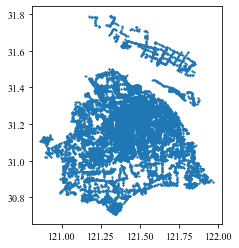

In [127]:
bus.plot(markersize=1)

In [128]:
len(bus)

41977

In [129]:
len(subway)

403

<AxesSubplot:>

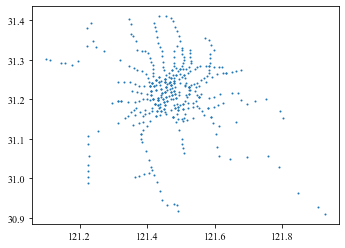

In [130]:
subway.plot(markersize=1)

In [131]:
region.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [132]:
bus = bus.to_crs(epsg=3857)
subway = subway.to_crs(epsg=3857)
region = region.to_crs(epsg=3857)

In [133]:
bus.head()

,name,geometry
0,上海西站,POINT (13514054.475 3667065.054)
1,曹杨路芝川路,POINT (13514137.207 3666876.048)
2,曹杨路铜川路,POINT (13514336.891 3666126.308)
3,铜川路曹杨路,POINT (13514747.707 3665679.061)
4,武宁新村,POINT (13516117.386 3664116.930)


# 按照半径做缓冲

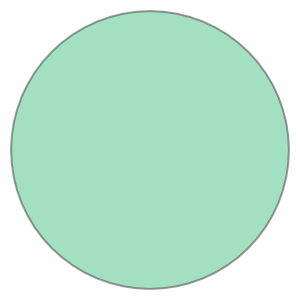

In [135]:
bus['geometry'][0].buffer(158)

In [136]:
bus['geometry'] = bus['geometry'].apply(lambda x:x.buffer(158))

In [137]:
bus.head()

,name,geometry
0,上海西站,"POLYGON ((13514212.475 3667065.054, 13514211.7..."
1,曹杨路芝川路,"POLYGON ((13514295.207 3666876.048, 13514294.4..."
2,曹杨路铜川路,"POLYGON ((13514494.891 3666126.308, 13514494.1..."
3,铜川路曹杨路,"POLYGON ((13514905.707 3665679.061, 13514904.9..."
4,武宁新村,"POLYGON ((13516275.386 3664116.930, 13516274.6..."


In [138]:
subway['geometry'] = subway['geometry'].apply(lambda x:x.buffer(1025))

In [139]:
subway.head()

,ST_NAME,line,geometry
0,10号线虹桥火车站,10号,"POLYGON ((13505681.223 3658223.094, 13505676.2..."
1,10号线五角场,10号,"POLYGON ((13527483.883 3671781.399, 13527478.9..."
2,10号线海伦路,10号,"POLYGON ((13524586.813 3666727.377, 13524581.8..."
3,4号线海伦路,4号,"POLYGON ((13524586.813 3666727.377, 13524581.8..."
4,8号线西藏北路,8号,"POLYGON ((13522360.938 3667267.079, 13522356.0..."


# 面几何的合并

In [140]:
type(subway['geometry'].unary_union)

shapely.geometry.multipolygon.MultiPolygon

In [141]:
subway_inf = gpd.GeoDataFrame({'geometry':[subway['geometry'].unary_union]},crs='epsg:3857')
bus_inf = gpd.GeoDataFrame({'geometry':[bus['geometry'].unary_union]},crs='epsg:3857')

# 公交站点影响范围

In [142]:
region.head()

,TownName,geometry
0,大场镇,"POLYGON ((13514210.924 3677030.234, 13514205.0..."
1,顾村镇,"POLYGON ((13518001.074 3677985.377, 13517914.9..."
2,高境镇,"POLYGON ((13524702.842 3676907.356, 13524319.7..."
3,张庙街道,"POLYGON ((13520795.803 3675632.292, 13520620.7..."
4,杨行镇,"POLYGON ((13522066.173 3684220.535, 13522101.0..."


In [143]:
busx = gpd.overlay(region,bus_inf,how='intersection')

<AxesSubplot:>

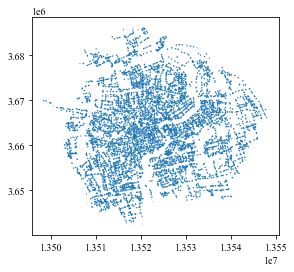

In [144]:
busx.plot()

In [145]:
busx['bus_area'] = busx['geometry'].area

In [146]:
busx.head()

,TownName,geometry,bus_area
0,大场镇,"MULTIPOLYGON (((13517152.344 3672621.263, 1351...",9.728687e+06
1,顾村镇,"MULTIPOLYGON (((13517746.362 3677598.020, 1351...",7.765208e+06
2,高境镇,"MULTIPOLYGON (((13524719.493 3677180.346, 1352...",3.706166e+06
3,张庙街道,"MULTIPOLYGON (((13520759.169 3675629.704, 1352...",2.758026e+06
4,杨行镇,"MULTIPOLYGON (((13522246.196 3680726.574, 1352...",8.151053e+06


# 地铁站点影响范围

In [147]:
subwayx = gpd.overlay(region,subway_inf,how='intersection')

<AxesSubplot:>

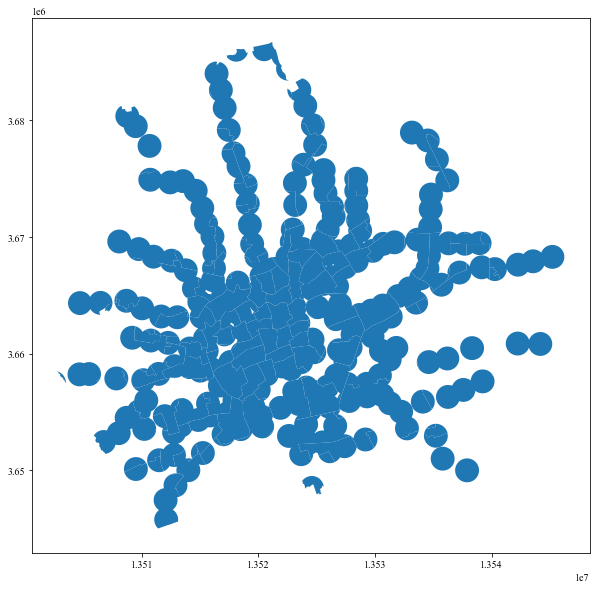

In [148]:
subwayx.plot(figsize=(10,10))

In [149]:
subwayx['subway_area'] = subwayx['geometry'].area

In [150]:
subwayx

,TownName,geometry,subway_area
0,大场镇,"POLYGON ((13516368.933 3671696.488, 13516323.3...",1.843684e+07
1,顾村镇,"MULTIPOLYGON (((13518001.074 3677985.377, 1351...",1.043949e+07
2,高境镇,"MULTIPOLYGON (((13524702.842 3676907.356, 1352...",5.433106e+06
3,张庙街道,"POLYGON ((13519572.898 3675261.872, 13519456.8...",2.600412e+06
4,杨行镇,"MULTIPOLYGON (((13523001.337 3681371.007, 1352...",1.568676e+07
...,...,...,...
110,东明路街道,"POLYGON ((13526550.219 3650700.022, 13526401.1...",5.685468e+06
111,梅陇镇,"POLYGON ((13513302.191 3647767.437, 13513169.1...",5.428898e+06
112,虹梅路街道,"POLYGON ((13515260.488 3656646.770, 13515278.9...",5.139472e+06
113,金桥镇,"MULTIPOLYGON (((13540169.175 3666832.488, 1354...",3.533211e+06


In [151]:
busx

,TownName,geometry,bus_area
0,大场镇,"MULTIPOLYGON (((13517152.344 3672621.263, 1351...",9.728687e+06
1,顾村镇,"MULTIPOLYGON (((13517746.362 3677598.020, 1351...",7.765208e+06
2,高境镇,"MULTIPOLYGON (((13524719.493 3677180.346, 1352...",3.706166e+06
3,张庙街道,"MULTIPOLYGON (((13520759.169 3675629.704, 1352...",2.758026e+06
4,杨行镇,"MULTIPOLYGON (((13522246.196 3680726.574, 1352...",8.151053e+06
...,...,...,...
112,东明路街道,"MULTIPOLYGON (((13528877.476 3651022.736, 1352...",3.442240e+06
113,梅陇镇,"MULTIPOLYGON (((13520218.920 3642472.548, 1352...",1.004878e+07
114,虹梅路街道,"MULTIPOLYGON (((13515844.605 3655914.387, 1351...",3.417201e+06
115,金桥镇,"MULTIPOLYGON (((13540037.797 3667376.247, 1354...",3.276307e+06


In [152]:
bus_subway = pd.merge(busx[['TownName','bus_area']],subwayx[['TownName','subway_area']],on='TownName',how='left')

In [153]:
bus_subway = bus_subway.fillna(0)

In [154]:
df = region.merge(bus_subway,on='TownName')

In [155]:
df.head()

,TownName,geometry,bus_area,subway_area
0,大场镇,"POLYGON ((13514210.924 3677030.234, 13514205.0...",9.728687e+06,1.843684e+07
1,顾村镇,"POLYGON ((13518001.074 3677985.377, 13517914.9...",7.765208e+06,1.043949e+07
2,高境镇,"POLYGON ((13524702.842 3676907.356, 13524319.7...",3.706166e+06,5.433106e+06
3,张庙街道,"POLYGON ((13520795.803 3675632.292, 13520620.7...",2.758026e+06,2.600412e+06
4,杨行镇,"POLYGON ((13522066.173 3684220.535, 13522101.0...",8.151053e+06,1.568676e+07


In [156]:
df['area'] = df['geometry'].area

In [157]:
df['ARBus'] = df['bus_area'] / df['area']
df['ARSubway'] = df['subway_area'] / df['area']

In [158]:
df.head()

,TownName,geometry,bus_area,subway_area,area,ARBus,ARSubway
0,大场镇,"POLYGON ((13514210.924 3677030.234, 13514205.0...",9.728687e+06,1.843684e+07,4.328821e+07,0.224742,0.425909
1,顾村镇,"POLYGON ((13518001.074 3677985.377, 13517914.9...",7.765208e+06,1.043949e+07,5.736571e+07,0.135363,0.181981
2,高境镇,"POLYGON ((13524702.842 3676907.356, 13524319.7...",3.706166e+06,5.433106e+06,9.732711e+06,0.380795,0.558232
3,张庙街道,"POLYGON ((13520795.803 3675632.292, 13520620.7...",2.758026e+06,2.600412e+06,6.536191e+06,0.421962,0.397848
4,杨行镇,"POLYGON ((13522066.173 3684220.535, 13522101.0...",8.151053e+06,1.568676e+07,5.425333e+07,0.150241,0.289139


<AxesSubplot:>

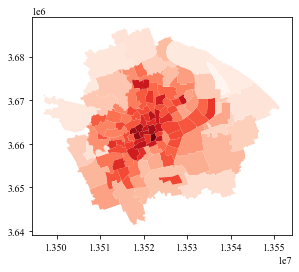

In [159]:
df.plot(column='ARBus',cmap='Reds')

<AxesSubplot:>

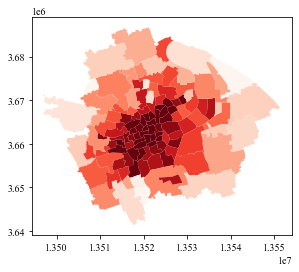

In [160]:
df.plot(column='ARSubway',cmap='Reds')

In [161]:
df.head(1)

,TownName,geometry,bus_area,subway_area,area,ARBus,ARSubway
0,大场镇,"POLYGON ((13514210.924 3677030.234, 13514205.0...",9.728687e+06,1.843684e+07,4.328821e+07,0.224742,0.425909


In [162]:
df.columns

Index(['TownName', 'geometry', 'bus_area', 'subway_area', 'area', 'ARBus',
       'ARSubway'],
      dtype='object')

In [163]:
df[['TownName', 'geometry','ARBus', 'ARSubway']].to_file('./data/factors/vls_bus_subway.shp',encoding='utf-8')

In [164]:
import geopandas as gpd
import numpy as np
import pandas as pd

In [165]:
poi = pd.read_csv('./data/factors/vls_poi.csv')

In [166]:
poi.head(1)

,index,POIMix,餐饮服务,生活服务,商务住宅
0,七宝镇,2.078903,0.128629,0.120488,0.056801


In [167]:
poi.columns

Index(['index', 'POIMix', '餐饮服务', '生活服务', '商务住宅'], dtype='object')

In [168]:
poi.columns = ['TownName', 'POIMix', 'PRt', 'PDLS', 'PRc']

In [169]:
poi.head(1)

,TownName,POIMix,PRt,PDLS,PRc
0,七宝镇,2.078903,0.128629,0.120488,0.056801


In [170]:
poi

,TownName,POIMix,PRt,PDLS,PRc
0,七宝镇,2.078903,0.128629,0.120488,0.056801
1,三林镇,2.024480,0.130000,0.134076,0.035054
2,上钢新村街道,2.227597,0.140271,0.153846,0.040486
3,东明路街道,2.065520,0.170696,0.178117,0.059796
4,临汾路街道,2.227712,0.121854,0.192169,0.077907
...,...,...,...,...,...
112,高东镇,2.218483,0.143670,0.197082,0.054649
113,高境镇,2.151009,0.178612,0.143221,0.049650
114,高桥镇,2.243799,0.134214,0.182992,0.071131
115,高行镇,2.208642,0.153519,0.161124,0.042279


In [171]:
bus_subway = gpd.read_file('./data/factors/vls_bus_subway.shp')

In [172]:
bus_subway

,TownName,ARBus,ARSubway,geometry
0,大场镇,0.224742,0.425909,"POLYGON ((13514210.924 3677030.234, 13514205.0..."
1,顾村镇,0.135363,0.181981,"POLYGON ((13518001.074 3677985.377, 13517914.9..."
2,高境镇,0.380795,0.558232,"POLYGON ((13524702.842 3676907.356, 13524319.7..."
3,张庙街道,0.421962,0.397848,"POLYGON ((13520795.803 3675632.292, 13520620.7..."
4,杨行镇,0.150241,0.289139,"POLYGON ((13522066.173 3684220.535, 13522101.0..."
...,...,...,...,...
112,东明路街道,0.509068,0.840815,"POLYGON ((13528547.832 3651808.312, 13528888.2..."
113,梅陇镇,0.257136,0.138919,"POLYGON ((13519851.391 3646099.343, 13519794.6..."
114,虹梅路街道,0.568812,0.855493,"POLYGON ((13515372.852 3656855.890, 13515352.0..."
115,金桥镇,0.188025,0.202768,"MULTIPOLYGON (((13540169.175 3666832.488, 1354..."


In [173]:
df = bus_subway.merge(poi,on='TownName')

In [174]:
df

,TownName,ARBus,ARSubway,geometry,POIMix,PRt,PDLS,PRc
0,大场镇,0.224742,0.425909,"POLYGON ((13514210.924 3677030.234, 13514205.0...",2.088112,0.135815,0.141586,0.045695
1,顾村镇,0.135363,0.181981,"POLYGON ((13518001.074 3677985.377, 13517914.9...",2.052613,0.134680,0.167765,0.032206
2,高境镇,0.380795,0.558232,"POLYGON ((13524702.842 3676907.356, 13524319.7...",2.151009,0.178612,0.143221,0.049650
3,张庙街道,0.421962,0.397848,"POLYGON ((13520795.803 3675632.292, 13520620.7...",2.149548,0.172688,0.181124,0.038198
4,杨行镇,0.150241,0.289139,"POLYGON ((13522066.173 3684220.535, 13522101.0...",2.069758,0.140243,0.134142,0.024475
...,...,...,...,...,...,...,...,...
112,东明路街道,0.509068,0.840815,"POLYGON ((13528547.832 3651808.312, 13528888.2...",2.065520,0.170696,0.178117,0.059796
113,梅陇镇,0.257136,0.138919,"POLYGON ((13519851.391 3646099.343, 13519794.6...",2.113857,0.123475,0.138094,0.030138
114,虹梅路街道,0.568812,0.855493,"POLYGON ((13515372.852 3656855.890, 13515352.0...",1.877341,0.104559,0.073612,0.051325
115,金桥镇,0.188025,0.202768,"MULTIPOLYGON (((13540169.175 3666832.488, 1354...",2.233114,0.148374,0.139949,0.034870


# 归一化

In [175]:
vars_use = df.copy()

In [176]:
vars_use.columns

Index(['TownName', 'ARBus', 'ARSubway', 'geometry', 'POIMix', 'PRt', 'PDLS',
       'PRc'],
      dtype='object')

In [177]:
cols = ['ARBus', 'ARSubway','POIMix', 'PRt', 'PDLS', 'PRc']

# 读取SDR，做连接

In [178]:
tob = pd.read_csv(r'./data/OD/SDR.csv')

In [179]:
tob = tob.drop_duplicates()

In [180]:
tob

,TownName,TOB_MINU
0,大场镇,18.616667
1,顾村镇,37.750000
2,高境镇,18.716667
3,张庙街道,23.900000
4,杨行镇,33.583333
...,...,...
112,东明路街道,30.700000
113,梅陇镇,39.850000
115,虹梅路街道,23.450000
116,金桥镇,25.900000


In [208]:
df_analysis = vars_use.merge(tob,on='TownName')

In [209]:
df_analysis

,TownName,ARBus,ARSubway,geometry,POIMix,PRt,PDLS,PRc,TOB_MINU
0,大场镇,0.2247,0.4259,"POLYGON ((13514210.924 3677030.234, 13514205.0...",2.0881,0.1358,0.1416,0.0457,18.6167
1,顾村镇,0.1354,0.1820,"POLYGON ((13518001.074 3677985.377, 13517914.9...",2.0526,0.1347,0.1678,0.0322,37.7500
2,高境镇,0.3808,0.5582,"POLYGON ((13524702.842 3676907.356, 13524319.7...",2.1510,0.1786,0.1432,0.0496,18.7167
3,张庙街道,0.4220,0.3978,"POLYGON ((13520795.803 3675632.292, 13520620.7...",2.1495,0.1727,0.1811,0.0382,23.9000
4,杨行镇,0.1502,0.2891,"POLYGON ((13522066.173 3684220.535, 13522101.0...",2.0698,0.1402,0.1341,0.0245,33.5833
5,庙行镇,0.3502,0.3535,"POLYGON ((13518715.866 3675032.580, 13518809.1...",2.1044,0.1505,0.1511,0.0384,22.5333
6,淞南镇,0.2045,0.2112,"POLYGON ((13525928.460 3679272.213, 13526157.5...",2.1115,0.1066,0.1292,0.0282,25.8333
7,宝山城市工业园区,0.1206,0.0000,"POLYGON ((13509566.413 3672397.059, 13509430.9...",1.6790,0.0817,0.2501,0.0250,51.2833
8,吴淞街道,0.2501,0.5927,"POLYGON ((13526229.182 3684386.250, 13526213.9...",2.2620,0.1394,0.1537,0.0568,27.4333
9,嘉兴路街道,0.4808,1.0000,"POLYGON ((13525549.949 3668196.244, 13525545.5...",2.2070,0.1280,0.1937,0.0496,15.7500


In [210]:
df_analysis.columns

Index(['TownName', 'ARBus', 'ARSubway', 'geometry', 'POIMix', 'PRt', 'PDLS',
       'PRc', 'TOB_MINU'],
      dtype='object')

In [211]:
df_analysis.drop(columns=['TownName','geometry','PRt','POIMix'], inplace=True)

In [212]:
df_analysis.columns

Index(['ARBus', 'ARSubway', 'PDLS', 'PRc', 'TOB_MINU'], dtype='object')

Text(0.5, 1.0, 'Correlation Matrix')

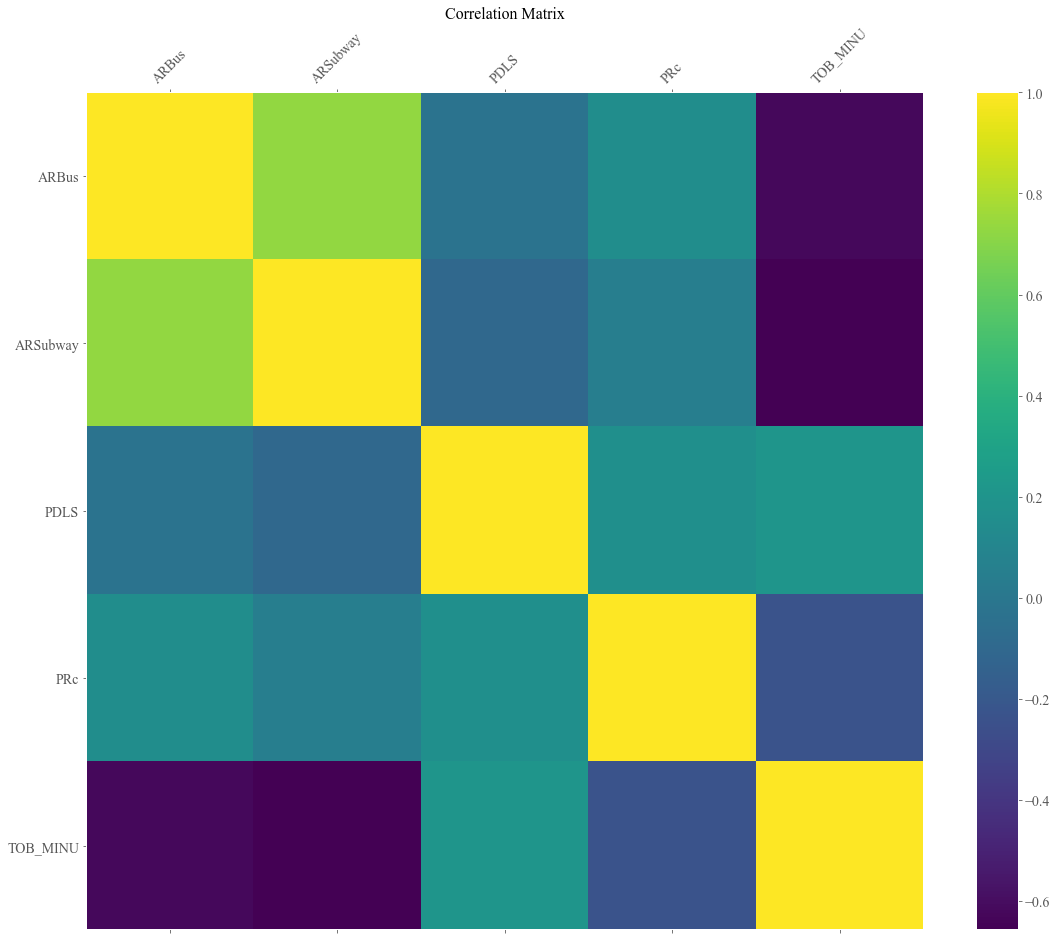

In [213]:
df = df_analysis
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [214]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [215]:
df_analysis.columns

Index(['ARBus', 'ARSubway', 'PDLS', 'PRc', 'TOB_MINU'], dtype='object')

In [216]:
# using VIF on the bike_rental dataset

df_predictors_selected_VIF = drop_column_using_vif_(df_analysis.drop('TOB_MINU', axis=1))
# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

The columns remaining after VIF selection are:
Index(['ARBus', 'ARSubway', 'PDLS', 'PRc'], dtype='object')


In [217]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [218]:
df_analysis_rental = sm.OLS(endog=df_analysis[['TOB_MINU']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
df_analysis_rental.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               TOB_MINU   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     32.26
Date:                Thu, 13 Jan 2022   Prob (F-statistic):           7.08e-18
Time:                        18:07:53   Log-Likelihood:                -375.09
No. Observations:                 117   AIC:                             760.2
Df Residuals:                     112   BIC:                             774.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.9016      3.973      8.785      0.000      27.029      42.774
ARBus        -14.7546      5.213     -2.830      0.006     -25.083      -4.426
ARSubway     -12.0367      2.699     -4.460      0.000     -17.385      -6.689
PDLS          63.7109     21.798      2.923      0.004      20.521     106.901
PRc         -151.4345     50.280     -3.012      0.003    -251.059     -51.810
==============================================================================
Omnibus:                       14.926   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.589
Skew:                           0.753   Prob(JB):                     0.000152
Kurtosis:                       4.158   Cond. No.                         117.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""